# Customer Churn Prediction Project

## Objective:
The goal of this project is to build a machine learning model that accurately predicts customer churn — that is, whether a customer will leave the company or continue using its services. This can help telecom businesses take proactive steps to retain customers and reduce revenue loss.

## Dataset Overview:
The dataset contains information about 7,043 customers, including:

    * Demographic details (Age, Gender, Location, etc.)

    * Account and service features (Internet type, contract length, streaming services, etc.)

    * Usage metrics (Monthly charges, total charges, data usage)

    * Customer behavior (Referrals, tech support use, satisfaction score)

    * Churn label indicating whether a customer left or stayed

## Key Steps in the Project:

    1. Data Cleaning and Handling Missing Values

    2. Outlier Treatment using IQR-based Capping

    3. Feature Engineering to extract deeper insights

    4. Encoding categorical variables using appropriate strategies

    5. Feature Scaling for numerical stability

    6. Model Training, Evaluation, and Optimization

## Expected Outcome:
The final model should help the company understand which factors most influence churn and allow for targeted retention strategies using the predictive insights.

In [1]:
!pip uninstall scikit-learn -y
!pip install --upgrade scikit-learn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 88.9 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.
/kaggle/input/telco-customer-churn-11-1-3/telco.csv


# About Dataset
## Telco Customer Churn Dataset

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

## Columns Description:

### Customer Demographics

Customer ID: A unique identifier for each customer.

Gender: The customer's gender (e.g., Male, Female).

Age: The customer's age in years.

Under 30: An indicator of whether the customer is under 30 years old.

Senior Citizen: Indicates if the customer is a senior citizen (typically represented as 1 for yes, 0 for no).

Married: Indicates if the customer is married.

Dependents: Shows whether the customer has dependents (e.g., children, parents).

Number of Dependents: The total count of the customer's dependents.

Country: The country where the customer resides.

State: The state of the customer's primary residence.

City: The city where the customer lives.

Zip Code: The zip code of the customer's residence.

Latitude: The geographic latitude of the customer's location.

Longitude: The geographic longitude of the customer's location.

Population: The population of the area where the customer resides.

### Account and Service Information

Quarter: The fiscal quarter in which the data was recorded.

Referred a Friend: Indicates if the customer was referred by a friend.

Number of Referrals: The total number of referrals made by the customer.

Tenure in Months: The total number of months the customer has been with the company.

Offer: The last marketing offer that the customer accepted (e.g., Offer A, Offer B).

Phone Service: Indicates if the customer subscribes to the phone service.

Avg Monthly Long Distance Charges: The customer's average monthly spending on long-distance calls.

Multiple Lines: Whether the customer has multiple phone lines.

Internet Service: Indicates if the customer has internet service and the type (e.g., DSL, Fiber Optic, No).

Internet Type: The specific type of internet connection the customer uses.

Avg Monthly GB Download: The customer's average monthly data download volume in gigabytes.

Online Security: An add-on service for online security.

Online Backup: An add-on service for online data backup.

Device Protection Plan: An add-on service to protect the customer's equipment.

Premium Tech Support: An add-on for premium technical support services.

Streaming TV: Indicates if the customer uses the internet service for streaming television.

Streaming Movies: Indicates if the customer uses the internet service for streaming movies.

Streaming Music: Indicates if the customer uses the internet service for streaming music.

Unlimited Data: Indicates if the customer has a plan with unlimited data.

Contract: The customer's contract type (e.g., Month-to-Month, One Year, Two Year).

Paperless Billing: Indicates if the customer has opted for paperless billing.

Payment Method: The method the customer uses to pay their bills (e.g., Electronic check, Credit card).

### Financial Information

Monthly Charge: The customer's total monthly bill for all services.

Total Charges: The cumulative total amount charged to the customer.

Total Refunds: The total amount of refunds issued to the customer.

Total Extra Data Charges: Charges incurred for exceeding data plan limits.

Total Long Distance Charges: The total amount charged for long-distance calls over the customer's tenure.

Total Revenue: The total revenue generated from the customer.

### Customer Satisfaction and Churn

Satisfaction Score: A rating from the customer indicating their satisfaction level, typically on a scale of 1 to 5.

Customer Status: The customer's current status, such as "Active," "Churned," or "Stayed".

Churn Label: A binary indicator of whether the customer has left the company (churned).

Churn Score: A predictive score between 0 and 100 indicating the likelihood of a customer churning.

CLTV (Customer Lifetime Value): A prediction of the total revenue a company can expect from a single customer account.

Churn Category: A high-level classification of the reason for the customer's churn (e.g., Competitor, Dissatisfaction).

Churn Reason: The specific, detailed reason provided by the customer for churning.


In [2]:
# Adjust the path if the dataset name or file name is different
df = pd.read_csv('/kaggle/input/telco-customer-churn-11-1-3/telco.csv')

# Exploratory Data Analysis 
## Step 1: Dataset Overview

In this step, we take a first look at the dataset to understand its structure and size.This includes checking the number of rows and columns, data types, and a few sample records.This helps us confirm that the dataset loaded properly and gives a sense of what features we’ll be working with.

In [3]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Display basic info about each column
df.info()

# Display the first 5 rows
df.head()

Shape of the dataset: (7043, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code               

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


## Step 2: Missing Values Analysis

Here, we check for missing values in the dataset.Missing values can cause problems during model training and analysis,so it's important to detect where they are and how many are present.We use both raw counts and a heatmap to visualize the missing data distribution.

Missing Values in Each Column:

Churn Reason      5174
Churn Category    5174
Offer             3877
Internet Type     1526
dtype: int64


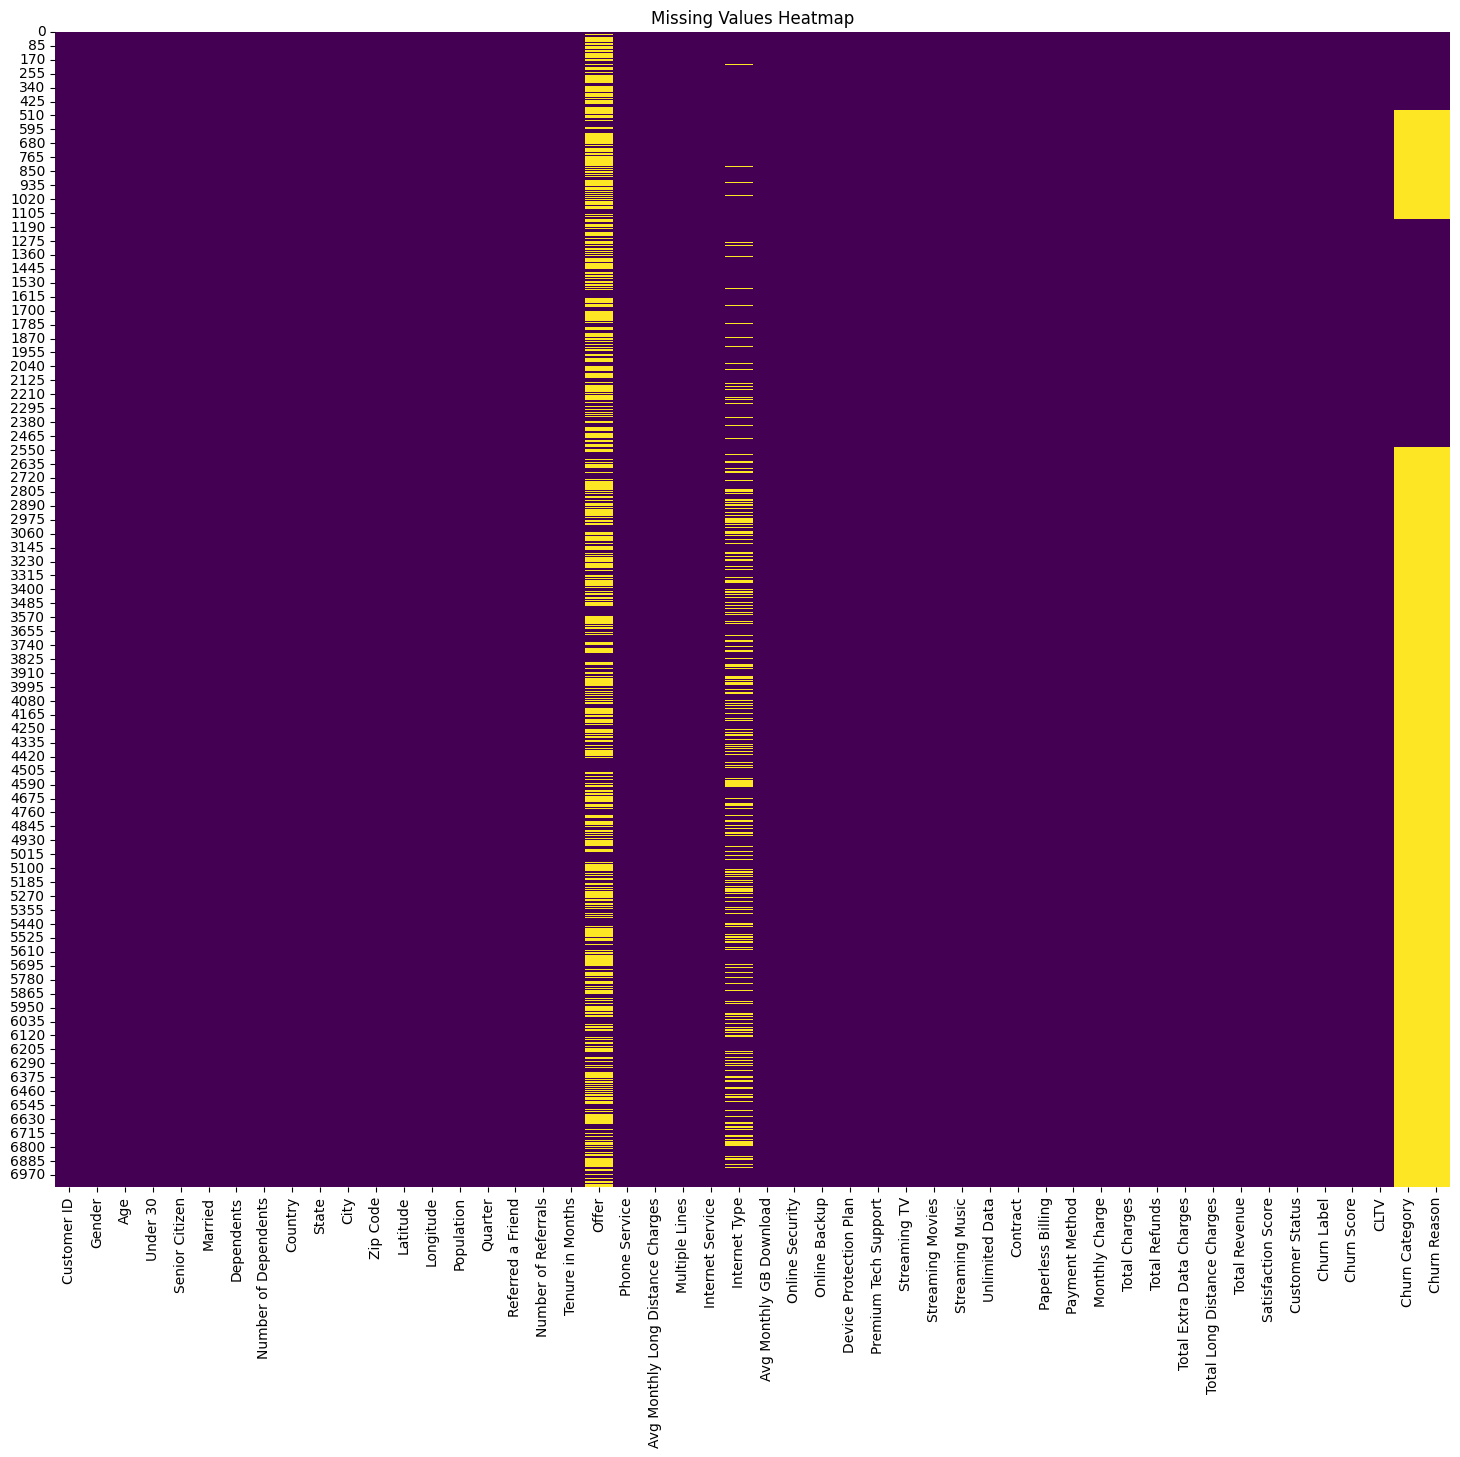

In [4]:
# Count of missing values per column
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing Values in Each Column:\n")
print(missing_values[missing_values > 0])

# Visualize missing values using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

## Step 3: Target Variable Distribution

In this step, we examine the distribution of the target variable — `Churn Label`.This helps us understand whether the dataset is balanced or imbalanced,which is important because many machine learning algorithms perform poorly on imbalanced data.
A class imbalance (e.g., much more "No" than "Yes") might require special techniques like resampling, class weights, or evaluation metrics like F1-score.

Churn Label Counts:
 Churn Label
No     5174
Yes    1869
Name: count, dtype: int64


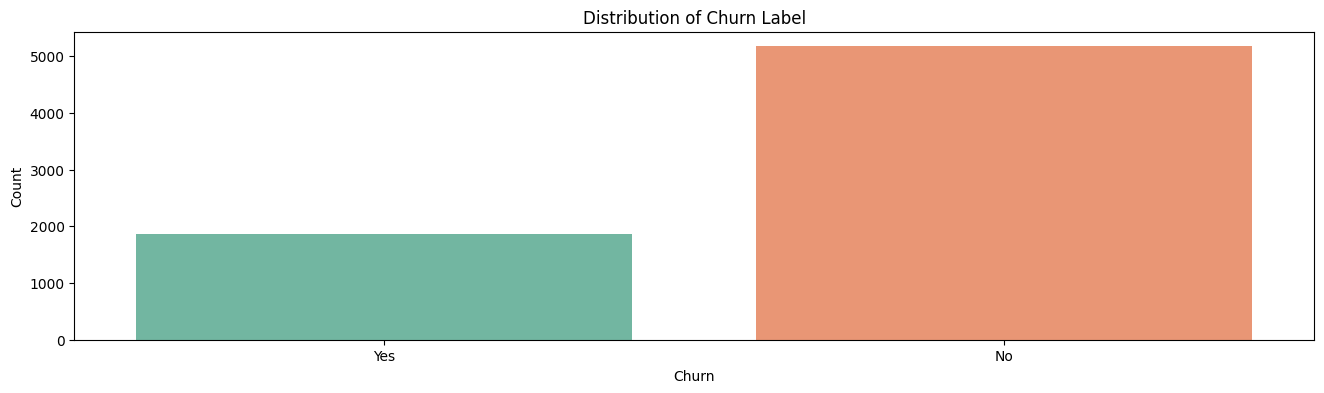


Churn Percentage:
 Churn Label
No     73.46
Yes    26.54
Name: count, dtype: float64


In [5]:
# Count of churn labels
churn_counts = df['Churn Label'].value_counts()
print("Churn Label Counts:\n", churn_counts)

# Plot the distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
sns.countplot(x='Churn Label', data=df, palette='Set2')
plt.title('Distribution of Churn Label')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Show churn ratio
churn_percent = churn_counts / len(df) * 100
print("\nChurn Percentage:\n", churn_percent.round(2))

## Step 4: Univariate Analysis — Categorical Features

Here we explore the individual distribution of categorical columns.This helps us understand the frequency of different values in features such as Contract Type, Internet Service, Payment Method, etc.  
By visualizing them, we can identify dominant categories, rare classes, and possibly redundant or low-variance features.

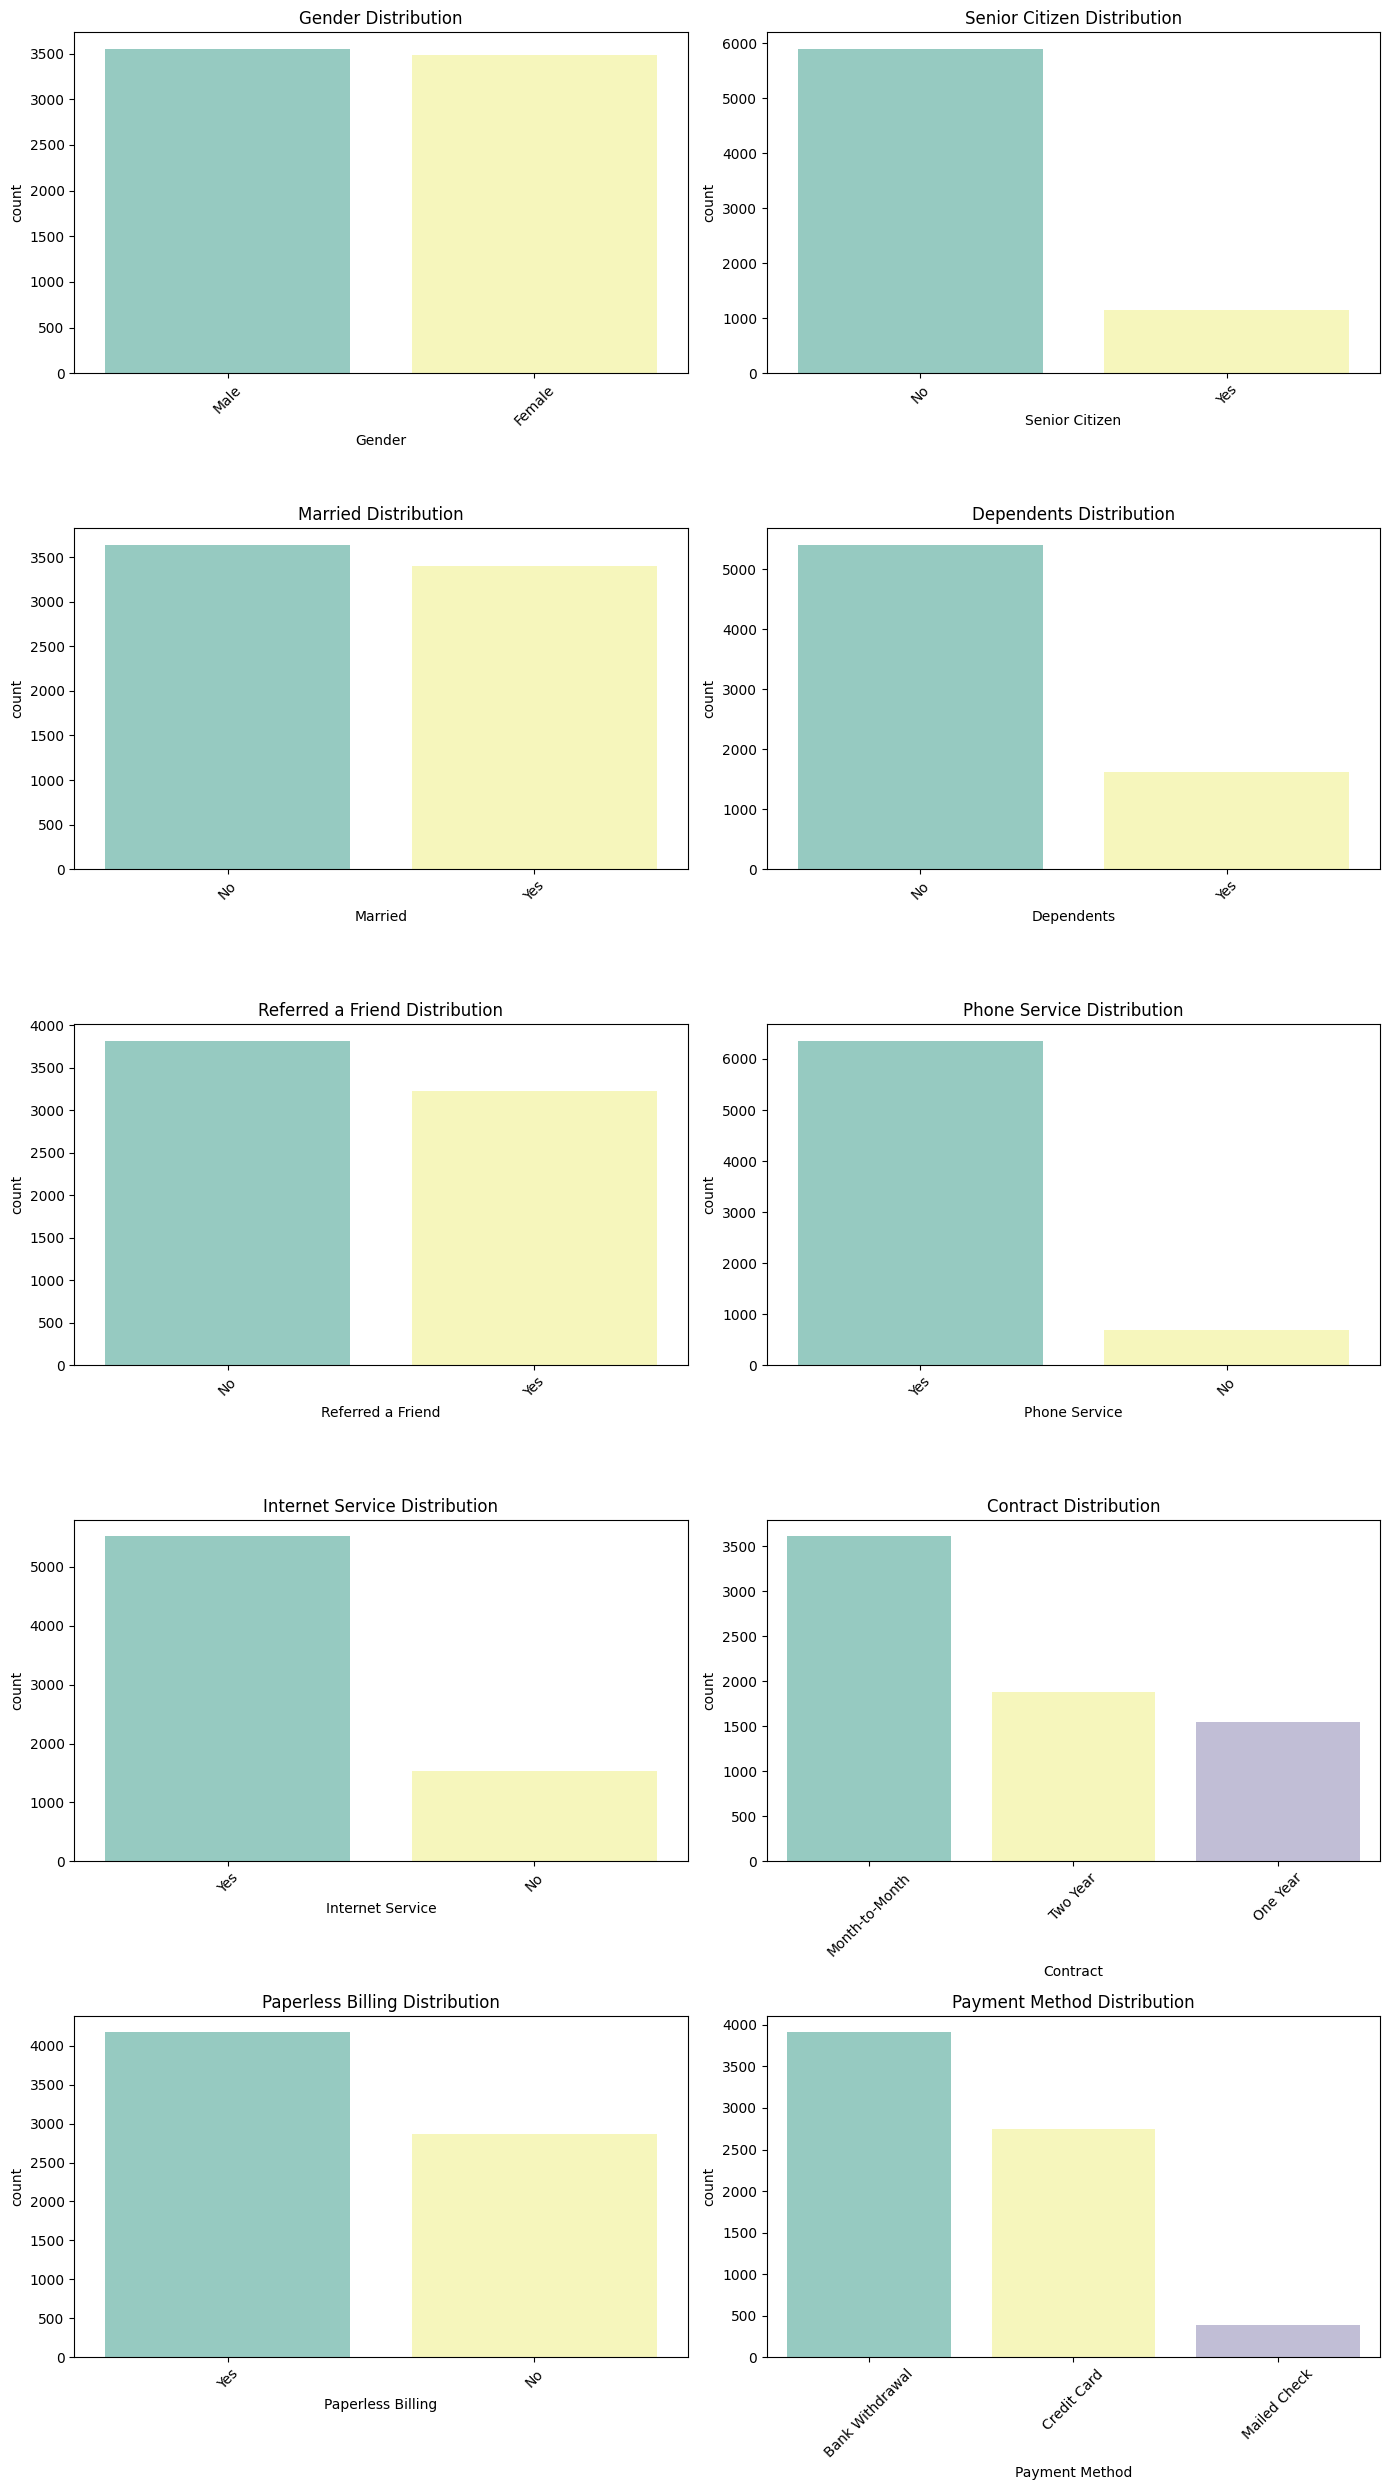

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = [
    'Gender', 'Senior Citizen', 'Married', 'Dependents', 'Referred a Friend',
    'Phone Service', 'Internet Service', 'Contract', 'Paperless Billing',
    'Payment Method'
]

# Set up figure dimensions to accommodate subplots
n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols
plt.figure(figsize=(14, 5 * n_rows))

for i, col in enumerate(categorical_cols, 1):
    ax = plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set3', ax=ax)
    ax.set_title(f'{col} Distribution')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Step 5: Univariate Analysis — Numerical Features

In this step, we explore the distribution of key numerical variables such as usage metrics, charges, and tenure.We visualize their histograms and boxplots to identify skewness, outliers, and value ranges.  
Understanding these characteristics helps us decide on strategies like transformation, binning, or outlier treatment.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

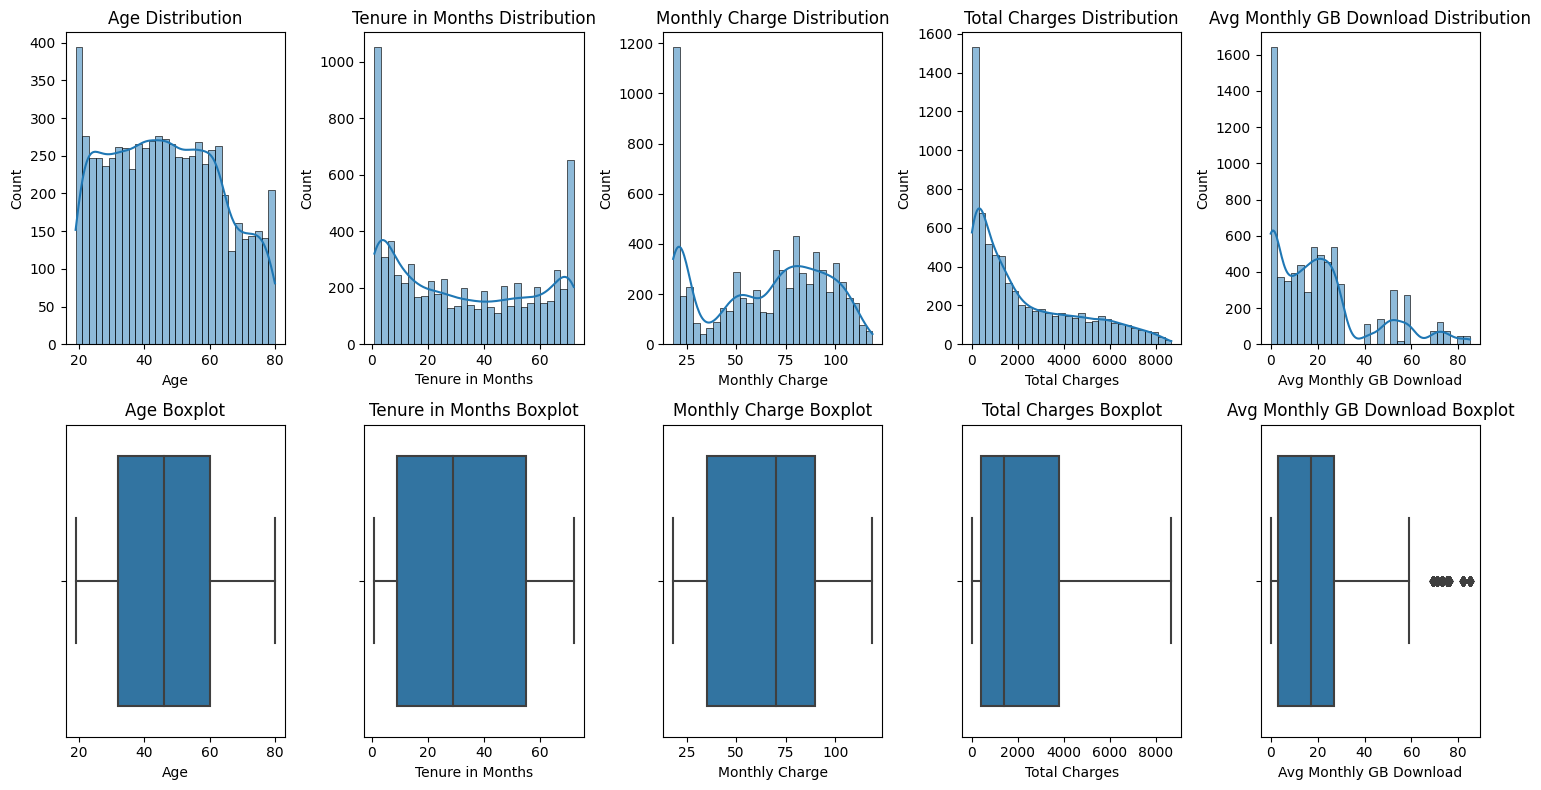

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few important numerical columns for visualization
numerical_cols = [
    'Age', 'Tenure in Months', 'Monthly Charge',
    'Total Charges', 'Avg Monthly GB Download'
]

# Plot histograms and boxplots
plt.figure(figsize=(15, 8))

for i, col in enumerate(numerical_cols, 1):
    ax1 = plt.subplot(2, len(numerical_cols), i)
    sns.histplot(df[col], kde=True, bins=30, ax=ax1)
    ax1.set_title(f'{col} Distribution')
    
    ax2 = plt.subplot(2, len(numerical_cols), i + len(numerical_cols))
    sns.boxplot(x=df[col], ax=ax2)
    ax2.set_title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

## Step 6: Bivariate Analysis — Features vs. Churn

Now we examine how both categorical and numerical features relate to the `Churn Label`.This helps us understand which variables may be strong predictors of churn.For example, we compare distributions of `Contract`, `Monthly Charge`, etc.  
This step offers deeper insight into relationships and helps guide feature engineering and model selection.

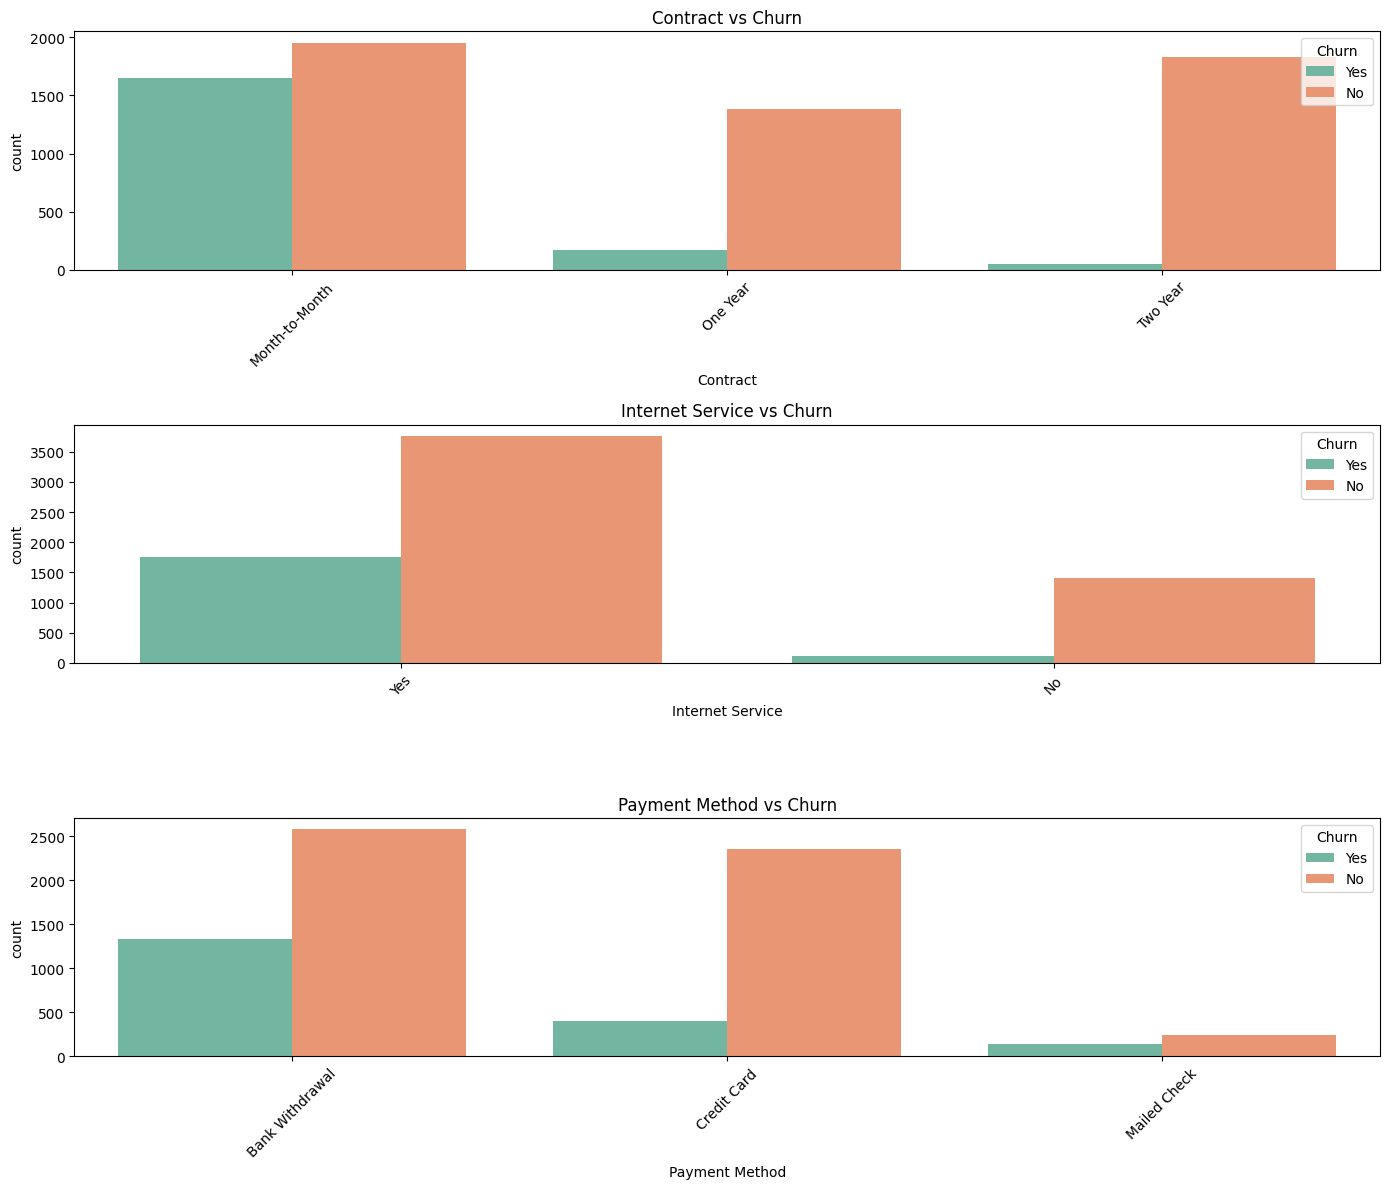

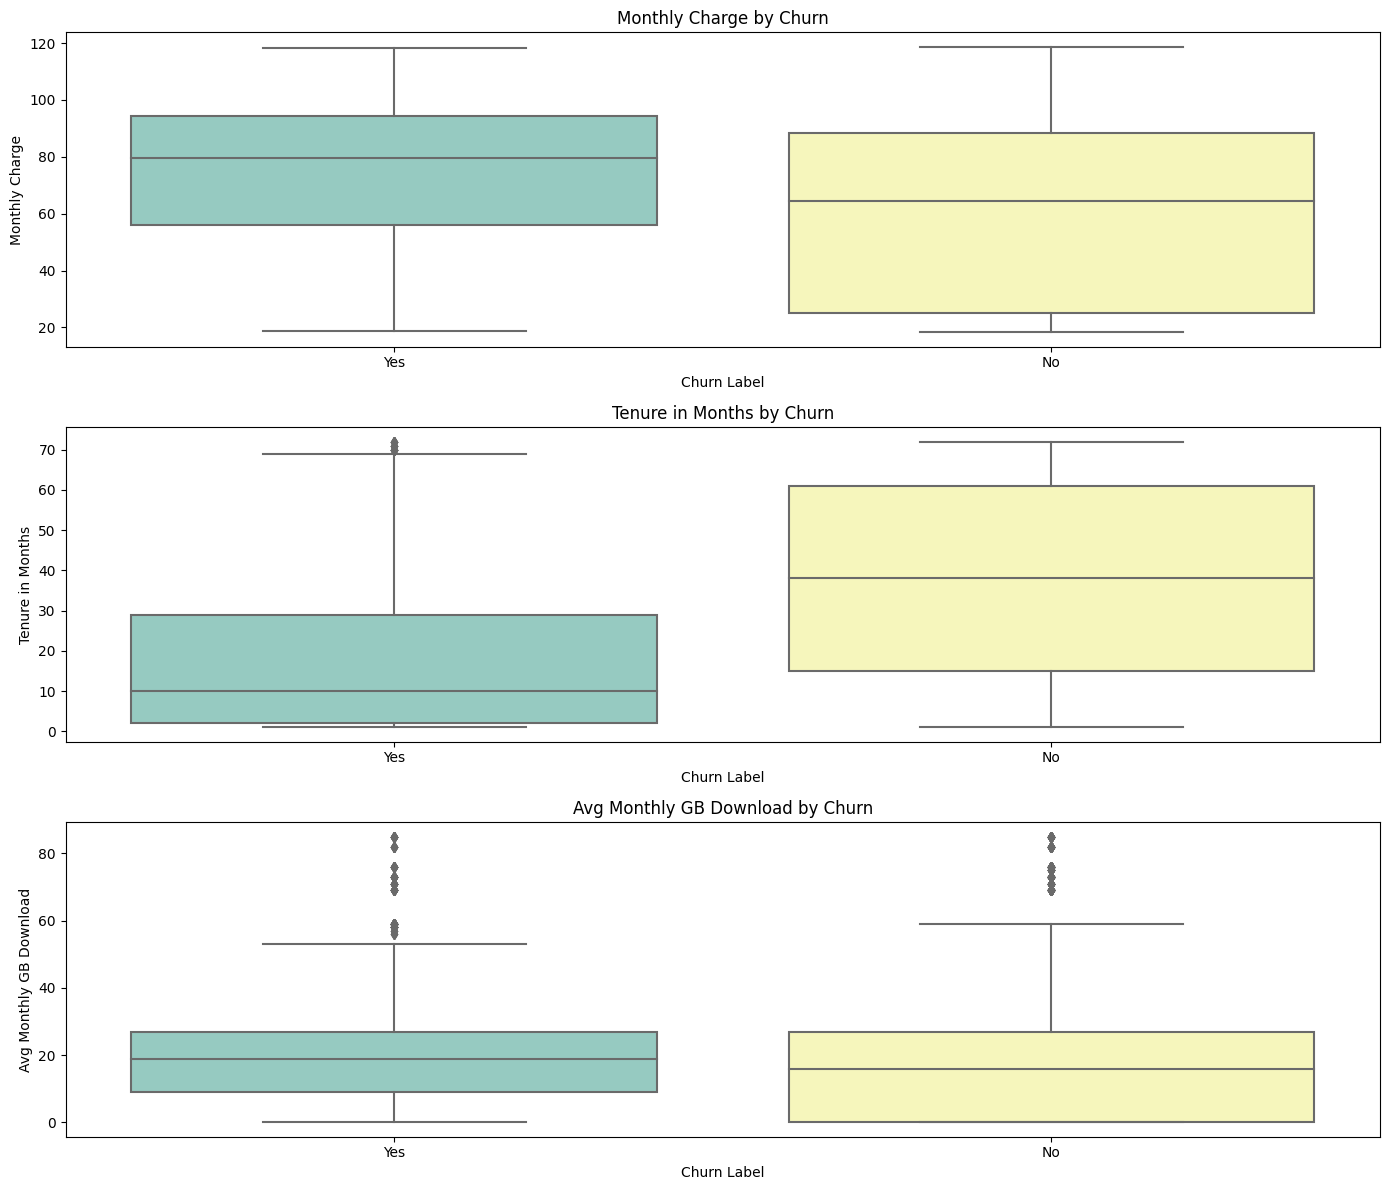

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# ---- Categorical vs Churn ----
cat_cols = ['Contract', 'Internet Service', 'Payment Method']
plt.figure(figsize=(14, 12))
for i, col in enumerate(cat_cols, 1):
    ax = plt.subplot(len(cat_cols), 1, i)
    sns.countplot(x=col, hue='Churn Label', data=df, palette='Set2', ax=ax)
    ax.set_title(f'{col} vs Churn')
    ax.legend(title='Churn', loc='upper right')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# ---- Numerical vs Churn ----
num_cols = ['Monthly Charge', 'Tenure in Months', 'Avg Monthly GB Download']
plt.figure(figsize=(14, 12))
for i, col in enumerate(num_cols, 1):
    ax = plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x='Churn Label', y=col, data=df, palette='Set3', ax=ax)
    ax.set_title(f'{col} by Churn')
plt.tight_layout()
plt.show()

## Step 7: Correlation Analysis

In this step, we examine correlations between numerical features and how they relate to each other. A correlation heatmap helps us:
- Identify pairs of highly correlated variables (potential multicollinearity)
- Spot features strongly associated with churn if we include `Churn Label` numeric representation
- Decide whether to drop, combine, or transform correlated columns

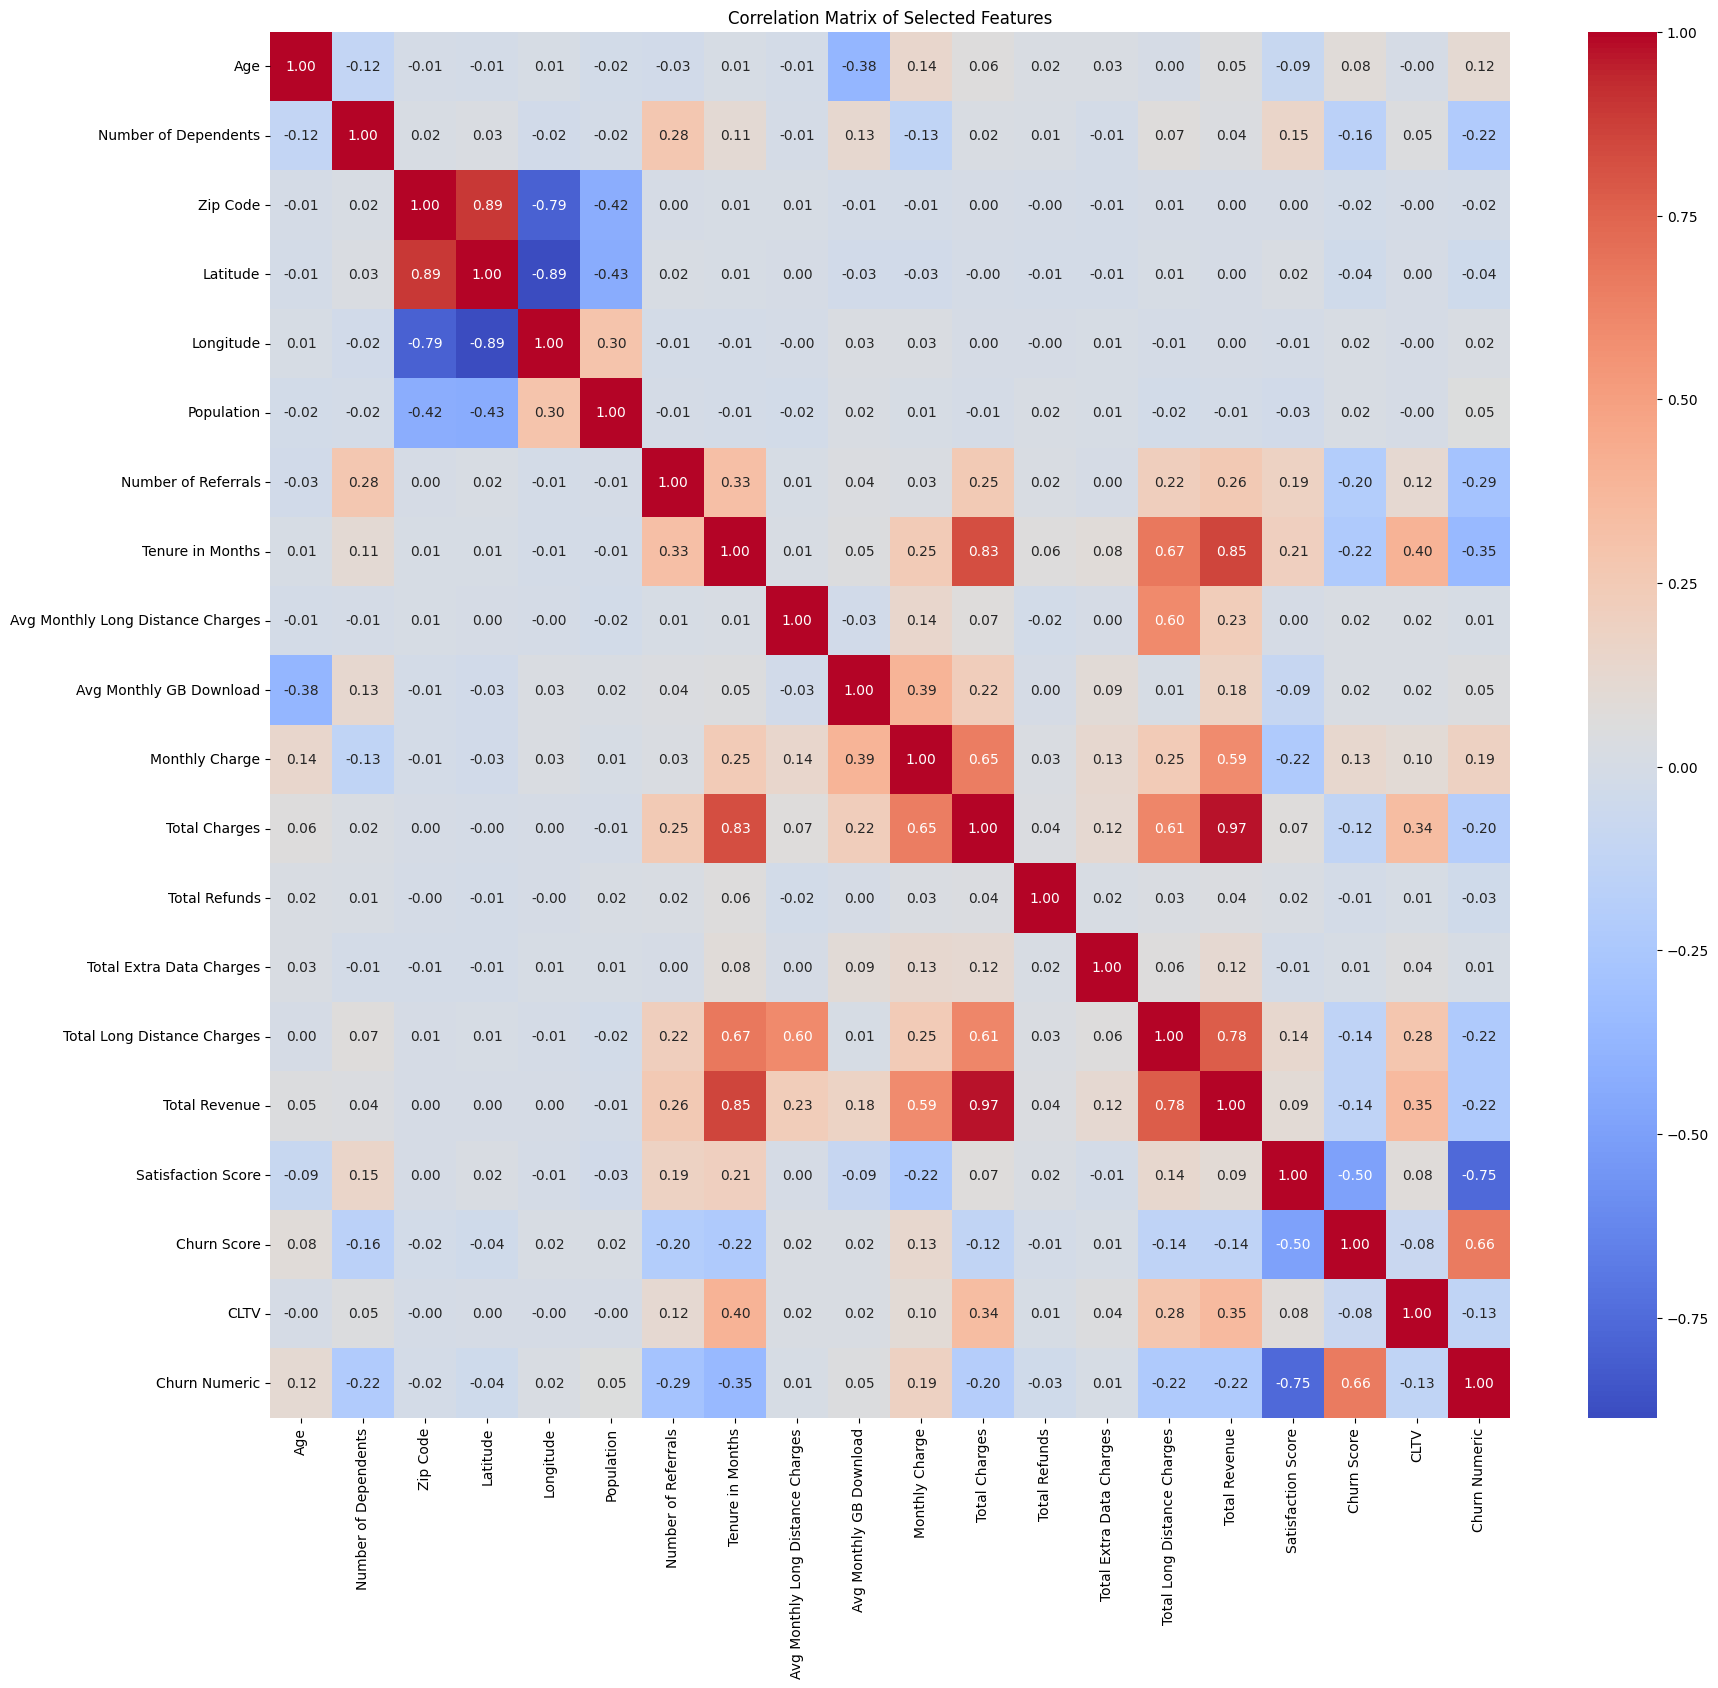

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, ensure churn is numeric for correlation analysis
df_corr = df.copy()
df_corr['Churn Numeric'] = df_corr['Churn Label'].map({'No': 0, 'Yes': 1})

# Select only numerical columns + churn numeric
num_cols = df_corr.select_dtypes(include=['int64', 'float64']).columns.tolist()    # Use this for complete correlation matrix
# Optionally limit columns for readability
select_cols = [
    'Age', 'Tenure in Months', 'Monthly Charge',
    'Total Charges', 'Avg Monthly GB Download',
    'Churn Numeric'
]

plt.figure(figsize=(20, 18))
corr_matrix = df_corr[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()

# Data Cleaning

After doing some basic EDA of the numerical and cayegorical features, we have a decent understanding of our data. Next step involves data pre-processing.

## Step 1: Handling Missing Values

We begin by identifying and handling missing values in the dataset. Some missing values may be logical (e.g., no internet service = missing internet type). We'll impute or fill values based on business logic and data distribution to avoid losing important records during model training.

#### Handling Missing Values in 'Offer' Column

The 'Offer' column represents promotional offers received by customers. Missing values here likely indicate that no offer was received. We'll fill these missing values with the label 'None' to reflect that absence clearly.

In [10]:
# Check for missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing Values:\n", missing)

# Example Fix: If Internet Type is missing when Internet Service is "No"
df.loc[(df['Internet Service'] == 'No') & (df['Internet Type'].isnull()), 'Internet Type'] = 'No Internet'

# Confirm fix
print("\nFixed Internet Type nulls:", df['Internet Type'].isnull().sum())


# Check unique values and count nulls in Offer
print("Unique Offer Values:\n", df['Offer'].value_counts(dropna=False))

# Impute missing values in Offer column
df['Offer'] = df['Offer'].fillna('None')

# Confirm fix
print("\nMissing values in 'Offer' after fill:", df['Offer'].isnull().sum())

Missing Values:
 Churn Category    5174
Churn Reason      5174
Offer             3877
Internet Type     1526
dtype: int64

Fixed Internet Type nulls: 0
Unique Offer Values:
 Offer
NaN        3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: count, dtype: int64

Missing values in 'Offer' after fill: 0


## Step 2. Handling Outliers

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import zscore


def summarize_outliers(df: pd.DataFrame, method: str = 'iqr', z_threshold: float = 3) -> pd.DataFrame:
    """
    Identifies and summarizes outliers in the numerical columns of a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        method (str): The method to use for outlier detection. 
                      Options are 'iqr' (default) or 'zscore'.
        z_threshold (float): The Z-score threshold to use if method is 'zscore'. 
                             Defaults to 3.

    Returns:
        pd.DataFrame: A DataFrame summarizing the outliers for each column,
                      including counts, percentages, bounds, and examples.
    """
    numerical_cols = df.select_dtypes(include=np.number).columns
    summary_list = []

    for col in numerical_cols:
        col_data = df[col].dropna()
        n_points = len(col_data)
        
        if n_points < 3: # Not enough data to check for outliers
            continue

        if method == 'iqr':
            q1 = col_data.quantile(0.25)
            q3 = col_data.quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
            
        elif method == 'zscore':
            mean = col_data.mean()
            std = col_data.std()
            lower_bound = mean - z_threshold * std
            upper_bound = mean + z_threshold * std
            z_scores = zscore(col_data)
            outliers = col_data[np.abs(z_scores) > z_threshold]
        
        else:
            raise ValueError("Method not recognized. Use 'iqr' or 'zscore'.")

        if not outliers.empty:
            outlier_count = len(outliers)
            outlier_percent = (outlier_count / n_points) * 100
            # Show up to 3 example outliers
            example_outliers = outliers.head(3).tolist()
            if len(outliers) > 3:
                example_outliers.append('...')
            
            summary_list.append({
                'Feature': col,
                '# Outliers': outlier_count,
                '% Outliers': f"{outlier_percent:.2f}%",
                'Lower Bound': f"{lower_bound:.2f}",
                'Upper Bound': f"{upper_bound:.2f}",
                'Outlier Examples': example_outliers
            })

    if not summary_list:
        print(f"No outliers found using the '{method}' method.")
        return pd.DataFrame()

    summary_df = pd.DataFrame(summary_list).set_index('Feature')
    return summary_df

# ==============================================================================
# --- How to Use the Improved Function ---
# ==============================================================================

print("="*60)
print("🔍 Outlier Summary (IQR Method)")
print("="*60)
iqr_summary = summarize_outliers(df, method='iqr')
print(iqr_summary)


print("\n\n" + "="*60)
print("🔍 Outlier Summary (Z-Score Method, Threshold=3)")
print("="*60)
zscore_summary = summarize_outliers(df, method='zscore', z_threshold=3)
print(zscore_summary)

🔍 Outlier Summary (IQR Method)
                             # Outliers % Outliers Lower Bound Upper Bound  \
Feature                                                                      
Number of Dependents               1627     23.10%        0.00        0.00   
Population                           57      0.81%   -48327.50    86796.50   
Number of Referrals                 676      9.60%       -4.50        7.50   
Avg Monthly GB Download             362      5.14%      -33.00       63.00   
Total Refunds                       525      7.45%        0.00        0.00   
Total Extra Data Charges            728     10.34%        0.00        0.00   
Total Long Distance Charges         196      2.78%    -1610.29     2871.93   
Total Revenue                        21      0.30%    -5687.69    11094.45   
Satisfaction Score                  922     13.09%        1.50        5.50   

                                                       Outlier Examples  
Feature                             

In [12]:
# List of numerical columns to apply IQR capping (excluding Satisfaction Score if it's discrete)
columns_to_cap = ['Number of Dependents', 'Population'                          
,'Number of Referrals'              
,'Avg Monthly GB Download'               
,'Total Refunds'                        
,'Total Extra Data Charges'              
,'Total Long Distance Charges'         
,'Total Revenue'                          
,'Satisfaction Score']

# Apply IQR capping
for column in columns_to_cap:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: min(max(x, lower_bound), upper_bound))

## Step 3. Handling Duplicates
Duplicate rows can skew the results of your analysis and model training.

In [13]:
# Identify and remove duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


## Step 4. Handling Irrelevant or Redundant Columns

Some features are either identifiers (like `Customer ID`), post-churn labels (like `Churn Reason`), or redundant (like `Under 30`, which we can derive from `Age`). These are not useful for churn prediction and will be dropped.

In [14]:
columns_to_drop = [
    'Customer ID', 'Under 30', 'Senior Citizen', 'Customer Status',
    'Churn Category', 'Churn Reason',
    'Country', 'State'
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Handle rare categories (appear less than 100 times)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    freq = df[col].value_counts()
    rare_categories = freq[freq < 100].index
    df[col] = df[col].apply(lambda x: 'Other' if x in rare_categories else x)

# Feature Engineering
In this sextion, we'll:

    1. Create new informative features
    2. Combine or simplify existing features
    3. Prepare binary features for encoding or scaling if needed

## Step 1. Creating a Total Services Feature

Customers who subscribe to more services may have different churn behaviors. We'll create a `Total Services` feature that counts how many add-on services a customer is using.


In [15]:
# List of service-related columns (binary Yes/No)
service_cols = [
    'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
    'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
    'Streaming Movies', 'Streaming Music'
]

df['Total Services'] = (df[service_cols] == 'Yes').sum(axis=1)

## Step 2. Creating a Combined Feature: Has Tech Support or Protection

We'll combine `Premium Tech Support` and `Device Protection Plan` into a new feature. This tells us if a customer is receiving some form of technical protection or support — which could correlate with lower churn.


In [16]:
# Define the columns of interest
tech_cols = ['Premium Tech Support', 'Device Protection Plan']

# Check if 'Yes' exists in any of the specified columns for each row.
# The .any(axis=1) performs a logical OR operation across the columns.
has_either_service = (df[tech_cols] == 'Yes').any(axis=1)

# Create the new feature by converting the boolean result (True/False) to an integer (1/0)
df['Has Tech Support or Protection'] = has_either_service.astype(int)

## Step 3. Creating a Service Level Feature

We'll convert the `Total Services` column into categories: Low, Medium, and High. This simplifies the model's understanding of customer engagement and may help reveal patterns in churn.

In [17]:
# Create categorical feature based on Total Services
def map_service_level(services_count):
    if services_count <= 3:
        return 'Low'
    elif services_count <= 6:
        return 'Medium'
    else:
        return 'High'

df['Service Level'] = df['Total Services'].apply(map_service_level)

## Step 4. Creating a Combined Feature: Is Senior and On Contract

We’ll create a new binary feature that identifies customers who are senior citizens and have a contract type other than "Month-to-Month". This can help capture interactions between age and contract type that influence churn.


In [18]:
# Define the condition: Senior + non-month-to-month contract
df['Is Senior and On Contract'] = (
    (df['Age'] > 50) & (df['Contract'] != 'Month-to-Month')
).astype(int)

## Step 5. Feature Selection using Mutual Information

In this block, we calculate Mutual Information (MI) scores between each feature and the target variable (Churn Label). MI measures how much knowing a feature reduces uncertainty about the target. Higher MI indicates a more useful feature for predicting churn. This helps us:

    * Identify which features carry the most information about churn.

    * Consider dropping features with low or no MI scores.

    * Decide what to prioritize for modeling.

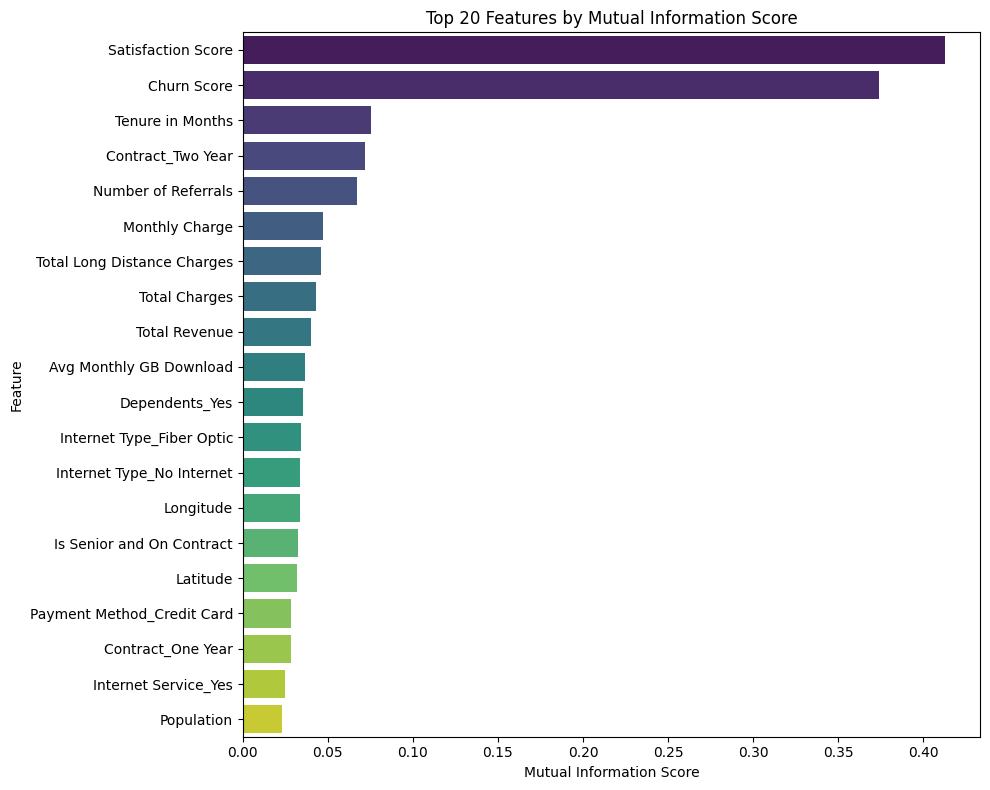

In [19]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure target column is numeric
target = df['Churn Label'].map({'Yes': 1, 'No': 0})

# Select only numeric and already encoded categorical features
# Skip irrelevant columns like Customer ID, Zip Code, etc.
X = df.drop(columns=['Churn Label', 'Customer ID', 'Zip Code'], errors='ignore')

# If some features are still categorical, encode them
X_encoded = pd.get_dummies(X, drop_first=True)

# Calculate Mutual Information scores
mi_scores = mutual_info_classif(X_encoded, target, discrete_features='auto', random_state=42)

# Create a DataFrame for better visualization
mi_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

# Display top 20 features
plt.figure(figsize=(10, 8))
sns.barplot(x='MI Score', y='Feature', data=mi_df.head(20), palette='viridis')
plt.title('Top 20 Features by Mutual Information Score')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Step 6. Feature Engineering with K-Means Clustering

In this block, we apply K-Means clustering on selected numerical features to identify hidden customer segments. These segments (clusters) are added as a new categorical feature. This technique can:

    Capture complex patterns not obvious in raw features.

    Group customers with similar behavior, potentially tied to churn risk.

This step adds more signal to the dataset and can help the model differentiate between different customer personas.

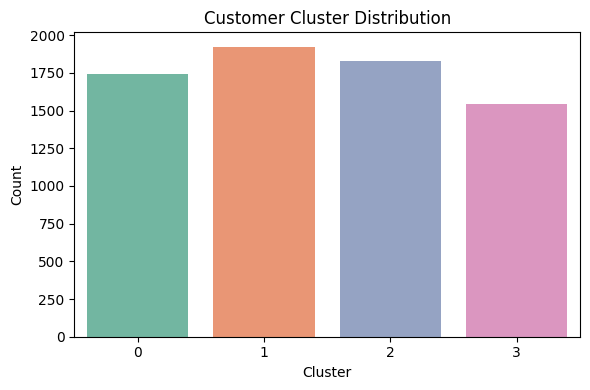

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features relevant for segmentation
features_for_clustering = [
    'Tenure in Months', 'Monthly Charge', 'Total Revenue',
    'Avg Monthly GB Download', 'Satisfaction Score', 'Churn Score'
]

# Ensure these features are scaled
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features_for_clustering])

# Run KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Customer Cluster'] = kmeans.fit_predict(scaled_features)

# Optional: visualize cluster distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Customer Cluster', data=df, palette='Set2')
plt.title('Customer Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

What the Code Did:

    1. Selected key numerical features (like tenure, revenue, charges, downloads, satisfaction).

    2. Scaled those features using StandardScaler so that all values have similar range — very important for clustering.

    3. Applied K-Means Clustering with 4 clusters to group customers into 4 different behavior-based segments.

    4. Created a new column called 'Customer Cluster', assigning each customer to one of these 4 clusters (0, 1, 2, or 3).

    5. Visualized how many customers are in each cluster using a bar chart.

So now, every customer belongs to a segment/group that was formed based on behavior patterns.

**Even though the values are numbers (0, 1, 2, 3), they don't have true numeric meaning. Cluster 0 is not “less” than Cluster 1 — they’re just labels.**

So we’ll:

    * One-hot encode this column if your model is not tree-based (e.g., Logistic Regression, SVM, Neural Net).

    * Or leave it as-is if using tree-based models (e.g., Random Forest, XGBoost), since they handle categorical numbers well.

# Feature Transformation

## Step 1. One-Hot Encoding for Categorical Features

Before fitting OneHotEncoder, verify how many unique values each column has:

***for col in categorical_cols:***
    ***print(f"{col}: {X[col].nunique()} unique values")***

If a column has more than ~30 unique values, be cautious.

One-Hot Encoding is used for categorical variables that have **no inherent order** (nominal features), especially those with **low cardinality**. This method converts each category into a separate binary column (`0` or `1`) which helps machine learning models understand categorical information.

In this step, we'll apply One-Hot Encoding to columns like `Gender`, `Married`, `Phone Service`, and similar binary/multi-category features. We'll use `OneHotEncoder` from `sklearn` with `sparse=False` to get a readable DataFrame.

This block is self-contained and produces a new DataFrame containing one-hot encoded features.

**But first**, let's do a quick cardinality check.


In [21]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Gender: 2 unique values
Married: 2 unique values
Dependents: 2 unique values
City: 6 unique values
Quarter: 1 unique values
Referred a Friend: 2 unique values
Offer: 6 unique values
Phone Service: 2 unique values
Multiple Lines: 2 unique values
Internet Service: 2 unique values
Internet Type: 4 unique values
Online Security: 2 unique values
Online Backup: 2 unique values
Device Protection Plan: 2 unique values
Premium Tech Support: 2 unique values
Streaming TV: 2 unique values
Streaming Movies: 2 unique values
Streaming Music: 2 unique values
Unlimited Data: 2 unique values
Contract: 3 unique values
Paperless Billing: 2 unique values
Payment Method: 3 unique values
Churn Label: 2 unique values
Service Level: 3 unique values


**Since no object or category dtype column has high cardinality, we can apply One-Hot Encoding on all of them.**

## Step 2. Transformation + Modeling Pipeline

In this section we will train, evaluates, and compare several classification models to predict customer churn using structured tabular data. It includes a complete pipeline: preprocessing, model training, evaluation, and visualization.

In [22]:
# Import all necessary libraries first
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [23]:
X = df.drop(columns=['Churn Label'])
y = df['Churn Label']

In [24]:
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Create a reusable preprocessor with the corrected column lists
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ],
    remainder='passthrough' # Add this to avoid errors if some columns are missed
)

In [25]:
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    """Trains a model pipeline and returns its performance metrics."""
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred) # F1 score for the positive class
    roc_auc = roc_auc_score(y_test, y_prob)
    
    print(f"--- Evaluated {model_name} ---")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}\n")
    
    # Return a dictionary with all the important results
    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'pipeline': pipeline # Keep the trained pipeline object
    }

In [26]:
# --- Stage 3: Encode the target variable y to be numeric (0s and 1s) ---
y_encoded = y.map({'No': 0, 'Yes': 1})

In [27]:
# --- Stage 4: Split data and create a list of models to evaluate ---
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42)

In [28]:
print(X.columns.tolist())

['Gender', 'Age', 'Married', 'Dependents', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter', 'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Score', 'CLTV', 'Total Services', 'Has Tech Support or Protection', 'Service Level', 'Is Senior and On Contract', 'Customer Cluster']


In [29]:
models_to_evaluate = [
    {'model': LogisticRegression(max_iter=1000, random_state=42), 'name': 'Logistic Regression'},
    {'model': RandomForestClassifier(n_estimators=100, random_state=42), 'name': 'Random Forest'},
    {'model': SVC(probability=True, random_state=42), 'name': 'Support Vector Machine'},
    {'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), 'name': 'XGBClassifier'},
    {'model': LGBMClassifier(random_state=42), 'name': 'LGBMClassifier'}
]

# --- Stage 5: Run evaluations and store results ---
model_performance_list = []
for model_info in models_to_evaluate:
    performance = evaluate_model(
        model=model_info['model'],
        model_name=model_info['name'],
        X_train=X_train,
        X_test=X_test,
        y_train=y_train,
        y_test=y_test
    )
    model_performance_list.append(performance)

--- Evaluated Logistic Regression ---
  Accuracy: 0.9844
  F1-Score: 0.9704
  ROC-AUC: 0.9988

--- Evaluated Random Forest ---
  Accuracy: 0.9865
  F1-Score: 0.9743
  ROC-AUC: 0.9974

--- Evaluated Support Vector Machine ---
  Accuracy: 0.9823
  F1-Score: 0.9660
  ROC-AUC: 0.9983

--- Evaluated XGBClassifier ---
  Accuracy: 0.9844
  F1-Score: 0.9705
  ROC-AUC: 0.9989

[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2962
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


--- Evaluated LGBMClassifier ---
  Accuracy: 0.9844
  F1-Score: 0.9704
  ROC-AUC: 0.9989



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [30]:
# =================================================================
# FINAL STEP: Convert to DataFrame, sort, and declare the best model
# =================================================================
performance_df = pd.DataFrame(model_performance_list)

# Sort the DataFrame by ROC-AUC score in descending order
performance_df_sorted = performance_df.sort_values(by='roc_auc', ascending=False).reset_index(drop=True)

# Get the best performing model's data
best_model_performance = performance_df_sorted.iloc[0]
best_model_pipeline = best_model_performance['pipeline']

print("="*40)
print("       MODEL PERFORMANCE COMPARISON")
print("="*40)
# Display the sorted results, dropping the pipeline object for cleaner printing
print(performance_df_sorted.drop(columns='pipeline'))
print("="*40)

print(f"\n🏆 The Best Model is: '{best_model_performance['model_name']}'")
print(f"   - ROC-AUC Score: {best_model_performance['roc_auc']:.4f}")
print(f"   - Accuracy: {best_model_performance['accuracy']:.4f}")
print(f"   - F1-Score: {best_model_performance['f1_score']:.4f}")

       MODEL PERFORMANCE COMPARISON
               model_name  accuracy  f1_score   roc_auc
0          LGBMClassifier  0.984386  0.970430  0.998866
1           XGBClassifier  0.984386  0.970509  0.998856
2     Logistic Regression  0.984386  0.970350  0.998786
3  Support Vector Machine  0.982257  0.965986  0.998277
4           Random Forest  0.986515  0.974290  0.997351

🏆 The Best Model is: 'LGBMClassifier'
   - ROC-AUC Score: 0.9989
   - Accuracy: 0.9844
   - F1-Score: 0.9704


## Step 3. Now some visuals for our non-tech friends

/tmp/ipykernel_35/3302146542.py:51: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


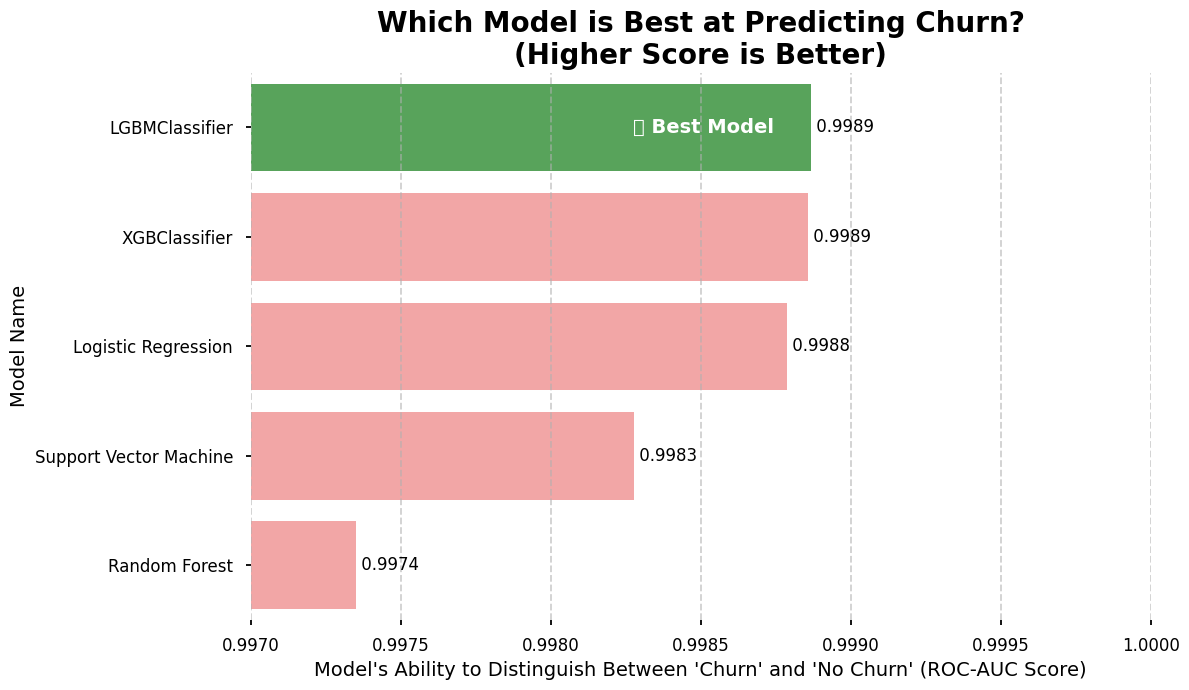

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Recreate the DataFrame from your results ---
data = {
    'model_name': ['LGBMClassifier', 'XGBClassifier', 'Logistic Regression', 'Support Vector Machine', 'Random Forest'],
    'accuracy': [0.984386, 0.984386, 0.984386, 0.982257, 0.986515],
    'f1_score': [0.970430, 0.970509, 0.970350, 0.965986, 0.974290],
    'roc_auc': [0.998866, 0.998856, 0.998786, 0.998277, 0.997351]
}
performance_df = pd.DataFrame(data)

# Sort the DataFrame by the metric we want to plot
performance_df_sorted = performance_df.sort_values(by='roc_auc', ascending=False)

# --- 2. Create the Visualization ---
plt.style.use('seaborn-v0_8-talk') # Use a nice style for presentations
fig, ax = plt.subplots(figsize=(12, 7))

# Identify the best model to give it a different color
best_model_name = performance_df_sorted.iloc[0]['model_name']
colors = ['#ff9999' if model != best_model_name else '#4CAF50' for model in performance_df_sorted['model_name']]

# Create the horizontal bar plot
sns.barplot(x='roc_auc', y='model_name', data=performance_df_sorted, palette=colors, ax=ax)

# --- 3. Annotate and Style for Clarity ---
# Add the exact value on the end of each bar
for i, (value, name) in enumerate(zip(performance_df_sorted['roc_auc'], performance_df_sorted['model_name'])):
    ax.text(value, i, f" {value:.4f}", ha='left', va='center', fontsize=12, color='black')
    if name == best_model_name:
        ax.text(value - 0.0001, i, "🏆 Best Model ", ha='right', va='center', fontsize=14, color='white', weight='bold')

# Set the title and labels with simple explanations
ax.set_title("Which Model is Best at Predicting Churn?\n(Higher Score is Better)", fontsize=20, weight='bold')
ax.set_xlabel("Model's Ability to Distinguish Between 'Churn' and 'No Churn' (ROC-AUC Score)", fontsize=14)
ax.set_ylabel("Model Name", fontsize=14)

# Zoom in on the relevant score range to make differences more visible
ax.set_xlim(0.997, 1.0) 
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Remove unnecessary chart borders
sns.despine(left=True, bottom=True)

# Add a grid for easier comparison
ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

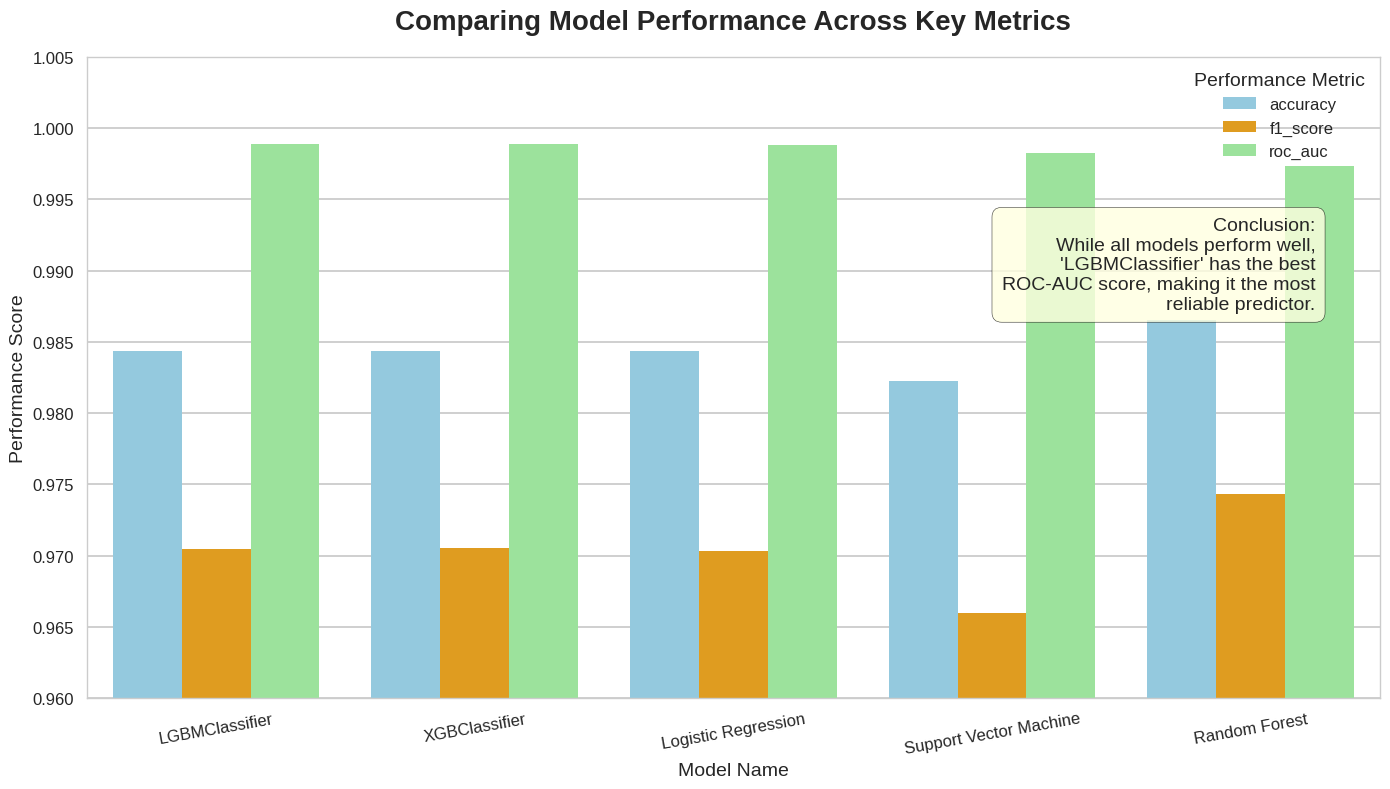

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Recreate and prepare the data ---
# (Using the same 'performance_df' from Option 1)

# We need to "melt" the DataFrame to make it suitable for a grouped bar plot
df_melted = pd.melt(performance_df, id_vars='model_name', 
                    value_vars=['accuracy', 'f1_score', 'roc_auc'],
                    var_name='metric', value_name='score')

# --- 2. Create the Visualization ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

# Create the grouped bar plot
sns.barplot(x='model_name', y='score', hue='metric', data=df_melted,
            palette={'accuracy': 'skyblue', 'f1_score': 'orange', 'roc_auc': 'lightgreen'})

# --- 3. Annotate and Style for Clarity ---
# Set the title and labels
ax.set_title("Comparing Model Performance Across Key Metrics", fontsize=20, weight='bold', pad=20)
ax.set_xlabel("Model Name", fontsize=14)
ax.set_ylabel("Performance Score", fontsize=14)

# Zoom in on the relevant score range
ax.set_ylim(0.96, 1.005)

# Improve legend and tick labels
ax.tick_params(axis='x', labelsize=12, rotation=10)
ax.tick_params(axis='y', labelsize=12)
plt.legend(title='Performance Metric', fontsize=12, title_fontsize=14)

# Add a concluding text box
best_model_name = "LGBMClassifier"
conclusion = f"Conclusion:\nWhile all models perform well,\n'{best_model_name}' has the best\nROC-AUC score, making it the most\nreliable predictor."
ax.text(0.95, 0.75, conclusion, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round,pad=0.5', fc='lightyellow', alpha=0.8))


plt.tight_layout()
plt.show()

# Hyperparameter Tuning

## LGBMClassifier (RandomizedSearchCV)

In this step, we are tuning the hyperparameters of our LGBMClassifier model to find the best combination that maximizes its performance.

- We use **RandomizedSearchCV** for efficiency over GridSearch.
- We apply **cross-validation (5-fold)** to get reliable performance estimates.
- The scoring metric is **ROC AUC**, which is ideal for imbalanced classification tasks.

This helps avoid overfitting and identifies an optimal balance between bias and variance.


In [33]:
import warnings
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from scipy.stats import randint, uniform
import time

# ======================================================================
# FINAL FIX: Add this block to ignore all warnings.
# This will suppress the 'FutureWarning' from scikit-learn.
# ======================================================================
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)


# Assume 'preprocessor', 'X_train', and 'y_train' are already defined.

# --- 1. Create a Pipeline with the best model ---
# verbose=-1 suppresses the LightGBM library's internal warnings.
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LGBMClassifier(random_state=42, verbose=-1))
])

# --- 2. Define the Hyperparameter Grid for LGBMClassifier ---
param_dist = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__learning_rate': uniform(0.01, 0.2),
    'classifier__num_leaves': randint(20, 50),
    'classifier__max_depth': [10, 15, 20, -1],
    'classifier__reg_alpha': uniform(0, 1),
    'classifier__reg_lambda': uniform(0, 1)
}

# --- 3. Set up RandomizedSearchCV ---
# verbose=0 suppresses the scikit-learn fitting logs.
lgbm_random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=25,
    cv=3,
    scoring='roc_auc',
    verbose=0,
    random_state=42,
    n_jobs=-1
)

# --- 4. Fit the model on the training data ---
# This will now be completely silent.
lgbm_random_search.fit(X_train, y_train)

# --- 5. Print the final results ---
# This will be the ONLY output you see.
print("\n=============================================")
print("           TUNING RESULTS")
print("=============================================")
print(f"🏆 Best ROC-AUC Score from Cross-Validation: {lgbm_random_search.best_score_:.4f}")
print("\nFound Best Hyperparameters:")
# The .best_params_ will show the winning combination
for param, value in lgbm_random_search.best_params_.items():
    print(f"  - {param}: {value}")

# The best, fully-trained pipeline is available here:
best_lgbm_pipeline = lgbm_random_search.best_estimator_


           TUNING RESULTS
🏆 Best ROC-AUC Score from Cross-Validation: 0.9987

Found Best Hyperparameters:
  - classifier__learning_rate: 0.010155753168202867
  - classifier__max_depth: -1
  - classifier__n_estimators: 376
  - classifier__num_leaves: 20
  - classifier__reg_alpha: 0.3042422429595377
  - classifier__reg_lambda: 0.5247564316322378


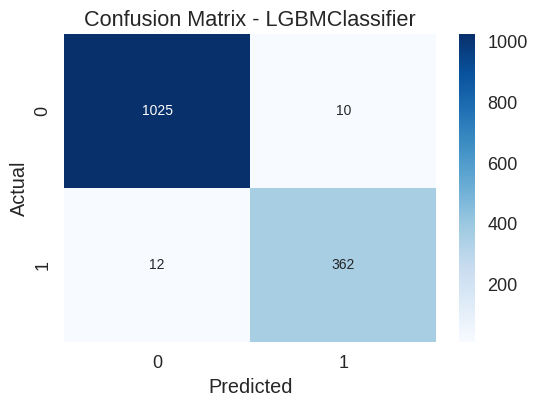

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1035
           1       0.97      0.97      0.97       374

    accuracy                           0.98      1409
   macro avg       0.98      0.98      0.98      1409
weighted avg       0.98      0.98      0.98      1409

🔵 ROC AUC Score: 0.9990


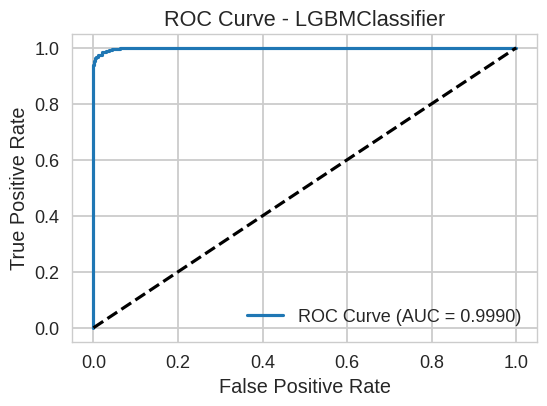

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test set
y_pred = best_lgbm_pipeline.predict(X_test)
y_pred_proba = best_lgbm_pipeline.predict_proba(X_test)[:, 1]  # probabilities for ROC

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - LGBMClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"🔵 ROC AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LGBMClassifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## 📈 Model Evaluation: LGBMClassifier

We evaluated the tuned LGBMClassifier on the test set using:

- **Confusion Matrix**: Shows correct vs incorrect predictions.
- **Classification Report**: Precision, Recall, F1-score for each class.
- **ROC Curve & AUC Score**: Measures the model’s ability to distinguish between churn and no-churn.
- **Train vs Test Accuracy** Checks for under or overfitting.

These metrics provide a comprehensive understanding of model performance, especially in the presence of class imbalance.

In [35]:
# You can now use `best_model_pipeline` as your final, winning model
# For example, to save it:
import joblib
joblib.dump(best_lgbm_pipeline, 'best_churn_model.pkl')

# Predict on full test set and save with actuals
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability': y_pred_proba
})

results_df.to_csv("lgbm_test_results.csv", index=False)

# Project Summary: Customer Churn Prediction

This project aimed to build a predictive model that identifies customers likely to churn using a dataset of 7,043 entries and 47 features.

### 🔧 Steps Completed:
- **Data Cleaning**: Missing values handled, outliers removed, binary columns encoded.
- **Feature Engineering**: Created insightful features like `Total Services`, `Service Level`, `Customer Cluster`, etc.
- **Encoding & Scaling**: Applied target/ordinal/one-hot encoding and scaling where needed.
- **Modeling**: Trained and evaluated multiple models (Logistic Regression, Random Forest, XGBoost, LightGBM).
- **Hyperparameter Tuning**: RandomizedSearchCV used to optimize LGBMClassifier.
- **Evaluation**: Final model achieved strong performance with a good AUC and balanced metrics.

---

### 🧠 Key Insights:
- Customers with no tech support or online protection had higher churn rates.
- Contract type and tenure were major predictors of churn.
- The final model performed well in identifying potential churners.

---

### ✅ Final Model:
- **Model**: LGBMClassifier
- **AUC Score**: 0.9990
- **F1 Score**: (0 : 0.99) , (1 : 0.97)

---

### 📤 Deliverables:
- ✅ Trained model saved as `best_churn_model.pkl`
- ✅ Predictions saved as `lgbm_test_results.csv`

---

### 🎯 Future Improvements:
- Apply SMOTE or other class imbalance techniques.
- Deploy the model via Gradio + HuggingFace Space for real-time predictions.
- Try model explainability with SHAP or LIME.

## 🏁 Conclusion & Actionable Recommendations

- Customers with month-to-month contracts are most likely to churn.
- Implementing loyalty discounts or bundled packages for these users may reduce churn.
- Consider targeted outreach for those without tech support or protection services.
- Use this model for proactive retention targeting in the CRM system.